In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('sy_listings.csv.gz', compression='gzip')
df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.818700e+04,1.818700e+04,1.818700e+04,18182.000000,18182.000000,0.0,18187.000000,18187.000000,18187.000000,15729.000000,...,15007.000000,15006.000000,15007.000000,15006.000000,15006.000000,18187.000000,18187.000000,18187.000000,18187.000000,15008.000000
mean,7.512222e+17,2.025061e+13,2.100809e+08,30.659773,46.326422,NaN,-33.851704,151.176240,4.026228,1.478193,...,4.661862,4.803636,4.826317,4.812280,4.620191,18.580030,15.491010,3.040358,0.022544,1.419056
std,5.519651e+17,0.000000e+00,2.080005e+08,101.830627,123.769916,NaN,0.089307,0.114807,2.503561,0.804047,...,0.484875,0.397831,0.390486,0.345362,0.468744,36.670231,33.888874,15.893604,0.431670,1.440055
min,1.115600e+04,2.025061e+13,3.558200e+04,0.000000,0.000000,NaN,-34.095680,150.630490,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,4.340418e+07,2.025061e+13,2.773097e+07,1.000000,2.000000,NaN,-33.897365,151.137145,2.000000,1.000000,...,4.560000,4.780000,4.820000,4.770000,4.500000,1.000000,1.000000,0.000000,0.000000,0.360000
50%,9.387170e+17,2.025061e+13,1.304256e+08,3.000000,5.000000,NaN,-33.875440,151.205363,4.000000,1.000000,...,4.800000,4.920000,4.950000,4.910000,4.730000,3.000000,1.000000,0.000000,0.000000,1.000000
75%,1.249723e+18,2.025061e+13,3.671959e+08,23.000000,34.000000,NaN,-33.803654,151.253066,5.000000,2.000000,...,4.970000,5.000000,5.000000,5.000000,4.880000,18.000000,12.000000,1.000000,0.000000,2.000000
max,1.439492e+18,2.025061e+13,6.998338e+08,912.000000,939.000000,NaN,-33.383640,151.340140,16.000000,21.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,195.000000,195.000000,155.000000,12.000000,17.470000


In [35]:
columns = ['latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price']
f_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']
# df_hotel['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)

df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df_need = df[columns]
df_numeric = df[f_columns]

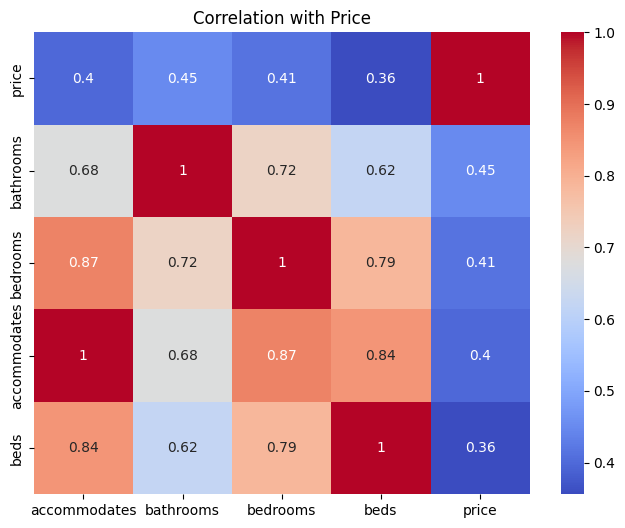

In [36]:
# 상관계수 계산
corr = df_numeric.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

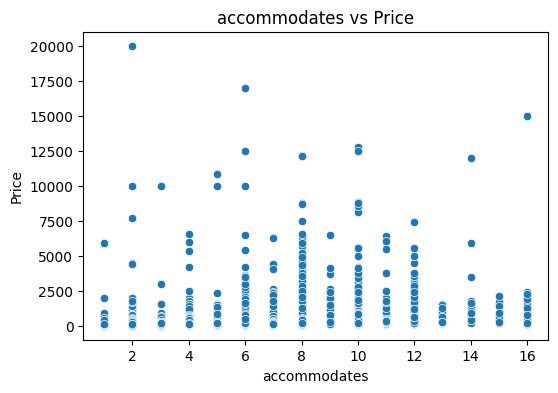

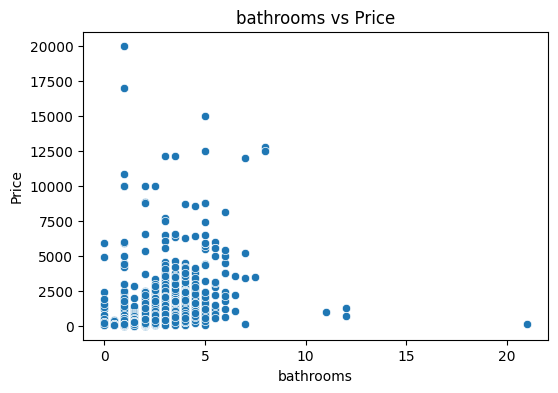

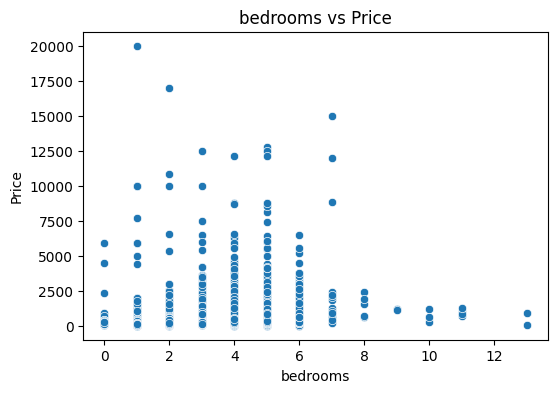

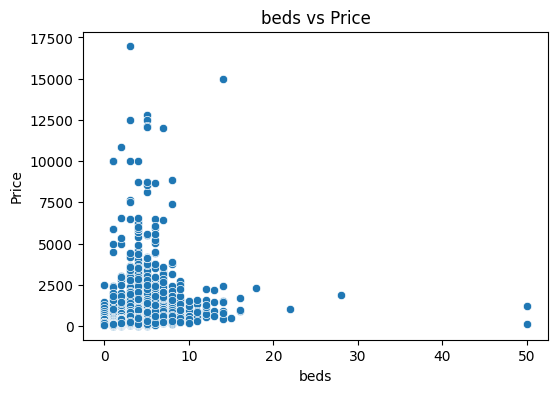

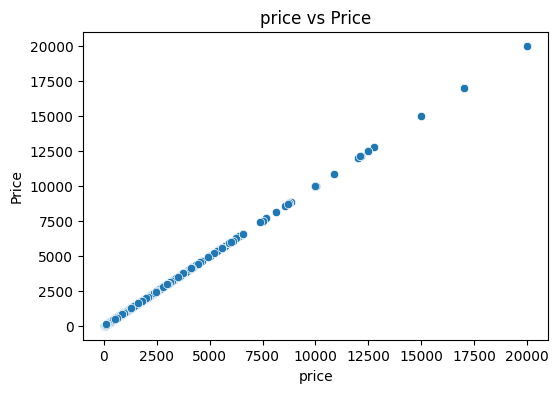

In [37]:
# numeric 데이터와의 산점도
for col in f_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_numeric, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

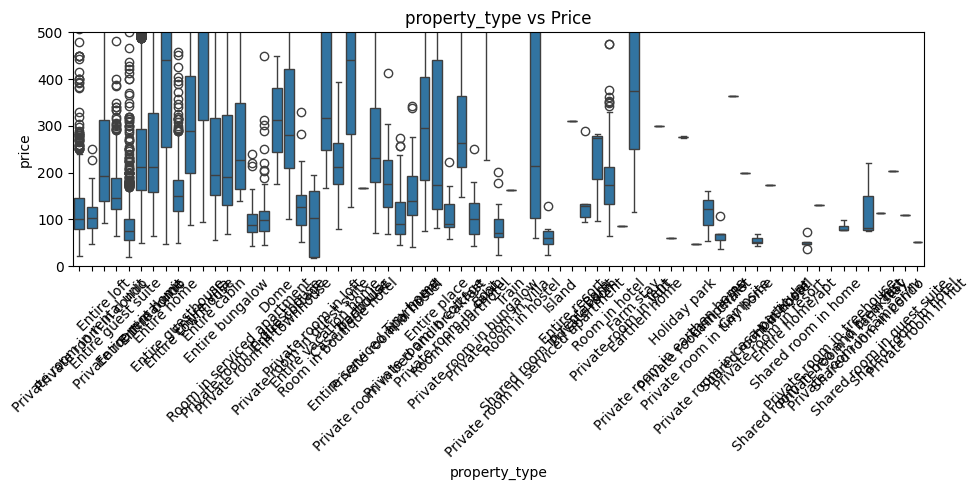

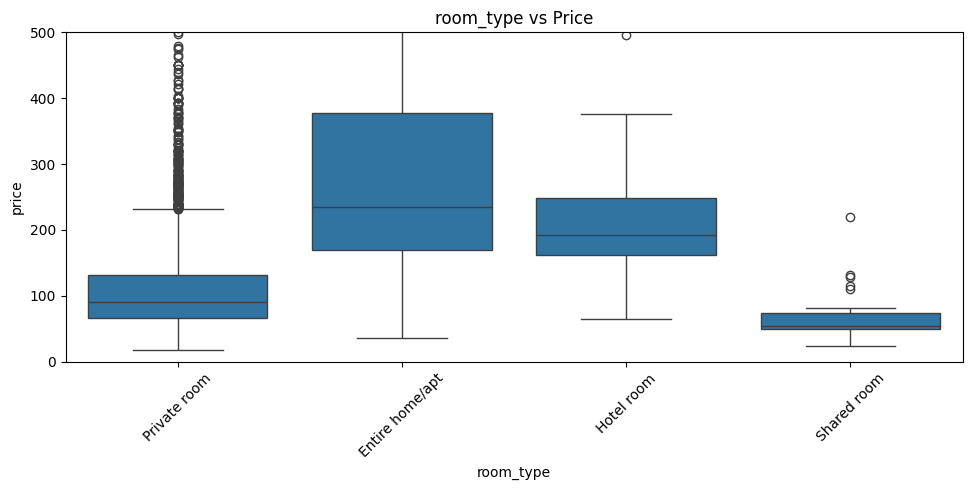

In [38]:
# 건물, 룸 타입에 따른 가격 분포도

for col in ['property_type', 'room_type']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_need, x=col, y='price')
    plt.xticks(rotation=45)
    plt.ylim(0, 70000)
    plt.title(f'{col} vs Price')
    plt.tight_layout()
    plt.ylim(0, 500)
    plt.show()

# apt, hotel room이 private room, share room보다 평균 가격 높음

C:\Users\tower\AppData\Local\Temp\ipykernel_16464\1294488675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_need['amenity_count'] = df_need['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)


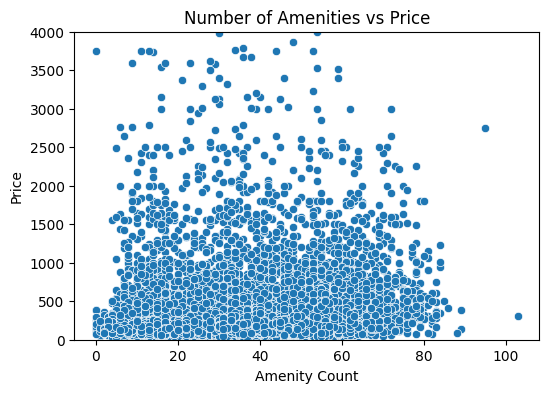

In [39]:
df_need['amenity_count'] = df_need['amenities'].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_need, x='amenity_count', y='price')
plt.title("Number of Amenities vs Price")
plt.xlabel("Amenity Count")
plt.ylabel("Price")
plt.ylim(0, 4000)
plt.show()
# 걍 없다고 봐야됨.

In [51]:
df_piece = df_need[df_need['room_type']=='Entire home/apt']

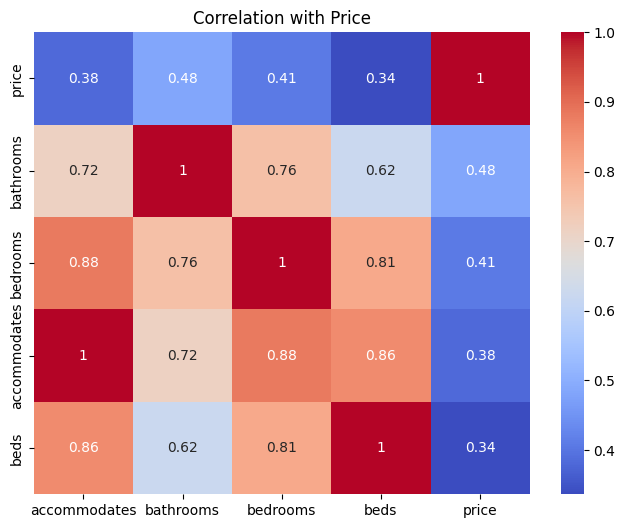

In [55]:
# 상관계수 계산
df_numeric = df_piece[f_columns]
df_numeric = df_numeric.dropna()

corr = df_numeric.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

C:\Users\tower\AppData\Local\Temp\ipykernel_16464\2541724349.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


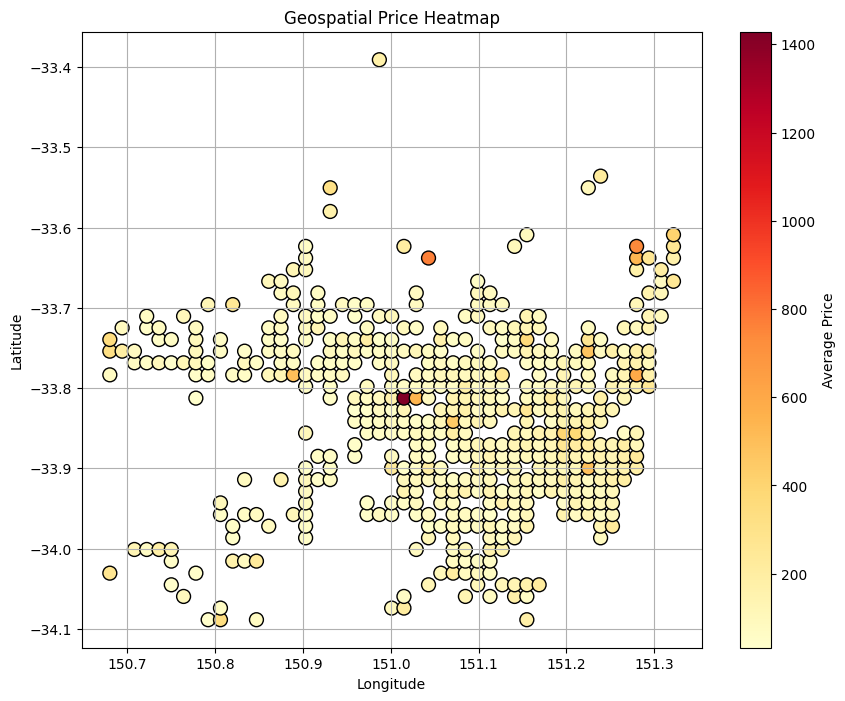

In [49]:
# 결측치 제거 (위도/경도/가격)
df_geo = df_piece[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 50)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 50)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.ylim(-33.9, -33.7)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()